# Jeremy Perez_Final Project

In [964]:
#Imported python libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

top 10 best selling products by year from 2015 to 2018

In [965]:
# Using pandas library, reads csv file into python.
data = pd.read_csv("/Users/jeremyp/Desktop/business_analytics_h.ws:notes/jeremy_perez/testing.csv")

# Extracts year from Date_of_Order column
data['Year'] = pd.to_datetime(data['Date_of_Order']).dt.year

# Filter data for the year 2018
data_2018 = data[data['Year'] == 2018]

# Groups the data by Product_name and calculate the total Units_sold for each product
product_units_sold_2018 = data_2018.groupby('Product_name')['Units_sold'].sum()

#makes data into a pandas dataframe. 
product_units_sold_2018df=pd.DataFrame(product_units_sold_2018)

# Sorts the products by total units sold from greatest to least. 
product_units_sold_2018df.sort_values(by=['Units_sold'],ascending=False,inplace=True)

# Shows the top selling products from previous years were no longer available.
product_units_sold_2018df


,Units_sold
Product_name,
Fighting video games,610
Summer dresses,378
Toys,276
Adult dog supplies,246
Smart watch,212
Rock music,144
First aid kit,123
Lawn mower,96
Men's gala suit,31


In [966]:
# Filter data for the year 2017
data_2017 = data[data['Year'] == 2017]

# Groups the data by Product_name and calculates the total Units_sold for each product
product_units_sold_2017 = data_2017.groupby('Product_name')['Units_sold'].sum()

# Sort the products by total units sold in descending order and select the top 10
top_products_2017 = product_units_sold_2017.nlargest(10)
top_products_2017


Product_name
Perfect Fitness Perfect Rip Deck                 24478
Total Gym 1400                                   24478
Nike Men's CJ Elite 2 TD Football Cleat          22553
Nike Men's Dri-FIT Victory Golf Polo             21020
O'Brien Men's Neoprene Life Vest                 19314
Field & Stream Sportsman 16 Gun Fire Safe        17493
Pelican Maverick 100X Kayak                      15793
Pelican Sunstream 100 Kayak                      15793
Diamondback Women's Serene Classic Comfort Bi    14188
Nike Men's Free 5.0+ Running Shoe                12305
Name: Units_sold, dtype: int64

In [967]:
# Filter data for the year 2016
data_2016 = data[data['Year'] == 2016]

# Group the data by Product_name and calculate the total Units_sold for each product
product_units_sold_2016 = data_2016.groupby('Product_name')['Units_sold'].sum()

# Sort the products by total units sold in descending order and select the top 10
top_products_2016 = product_units_sold_2016.nlargest(10)
top_products_2016


Product_name
Perfect Fitness Perfect Rip Deck                 32849
Total Gym 1400                                   32849
Nike Men's CJ Elite 2 TD Football Cleat          30148
Nike Men's Dri-FIT Victory Golf Polo             28148
O'Brien Men's Neoprene Life Vest                 25889
Field & Stream Sportsman 16 Gun Fire Safe        23158
Pelican Maverick 100X Kayak                      20235
Pelican Sunstream 100 Kayak                      20235
Diamondback Women's Serene Classic Comfort Bi    18071
Nike Men's Free 5.0+ Running Shoe                16287
Name: Units_sold, dtype: int64

In [968]:
# Filter data for the year 2015
data_2015 = data[data['Year'] == 2015]

# Group the data by Product_name and calculate the total Units_sold for each product
product_units_sold_2015 = data_2015.groupby('Product_name')['Units_sold'].sum()

# Sorts the products by total units sold in descending order and select the top 10
top_products_2015 = product_units_sold_2015.nlargest(10)
top_products_2015


Product_name
Perfect Fitness Perfect Rip Deck                 32478
Total Gym 1400                                   32478
Nike Men's CJ Elite 2 TD Football Cleat          28983
Nike Men's Dri-FIT Victory Golf Polo             27931
O'Brien Men's Neoprene Life Vest                 25678
Field & Stream Sportsman 16 Gun Fire Safe        22786
Pelican Maverick 100X Kayak                      20850
Pelican Sunstream 100 Kayak                      20850
Diamondback Women's Serene Classic Comfort Bi    18117
Nike Men's Free 5.0+ Running Shoe                17151
Name: Units_sold, dtype: int64

In [969]:
# Combines the dataframes into one dataframe with the same indexes under Product_name by the axis=1, column-wise.
top_products_concat = pd.concat([top_products_2015,top_products_2016, top_products_2017, product_units_sold_2018df], axis=1)

# Labels the legend by the year, must match the order of the list above.
top_products_concat.columns = ['2015','2016', '2017', '2018']

# Resets the index to make Product_name a column
top_products_concat.reset_index(inplace=True)

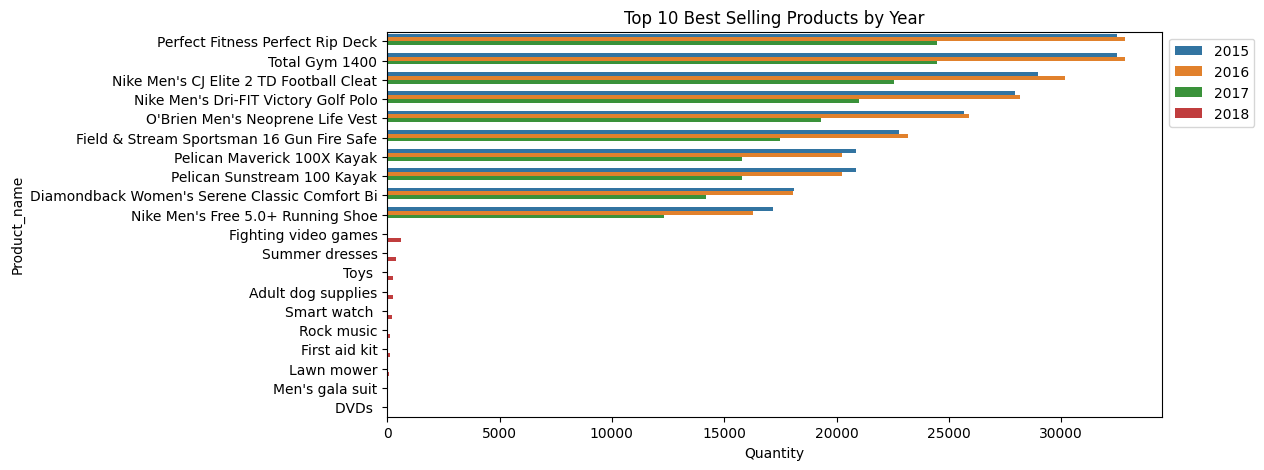

In [970]:

top_products_melted = pd.melt(top_products_concat, id_vars='Product_name', var_name='Year', value_name='Quantity')

# Plot
plt.figure(figsize=(10, 5))

# Setting x equal to the column 'Quantity'  and y to  the  column 'Product_name', produces a horizontal bar graph.
sns.barplot(data=top_products_melted, x='Quantity', y='Product_name' , hue='Year', palette='tab10')

plt.title('Top 10 Best Selling Products by Year')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Product Categories

In [971]:
product_type= pd.read_csv('/Users/jeremyp/Desktop/business_analytics_h.ws:notes/jeremy_perez/Results_categories.csv')
product_type

,Date_of_order,Product_name,Product_Price,Order_Profit_Per_Order,Category_Name
0,2018-01-31,Fighting video games,39.750000,9.790000,Video Games
1,2018-01-31,Toys,11.540000,1.530000,Toys
2,2018-01-31,Smart watch,327.750000,91.250000,Sporting Goods
3,2018-01-31,Summer dresses,215.820007,-126.559998,Women's Clothing
4,2018-01-31,Summer dresses,215.820007,-107.959999,Women's Clothing
...,...,...,...,...,...
984735,2015-01-01,Nike Men's Dri-FIT Victory Golf Polo,50.000000,91.180000,Women's Apparel
984736,2015-01-01,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,91.180000,Men's Footwear
984737,2015-01-01,Nike Men's Dri-FIT Victory Golf Polo,50.000000,68.250000,Women's Apparel
984738,2015-01-01,Nike Men's Dri-FIT Victory Golf Polo,50.000000,36.470001,Women's Apparel


In [972]:
product_type=product_type.drop(['Product_Price','Order_Profit_Per_Order'], axis=1)
product_type

,Date_of_order,Product_name,Category_Name
0,2018-01-31,Fighting video games,Video Games
1,2018-01-31,Toys,Toys
2,2018-01-31,Smart watch,Sporting Goods
3,2018-01-31,Summer dresses,Women's Clothing
4,2018-01-31,Summer dresses,Women's Clothing
...,...,...,...
984735,2015-01-01,Nike Men's Dri-FIT Victory Golf Polo,Women's Apparel
984736,2015-01-01,Nike Men's CJ Elite 2 TD Football Cleat,Men's Footwear
984737,2015-01-01,Nike Men's Dri-FIT Victory Golf Polo,Women's Apparel
984738,2015-01-01,Nike Men's Dri-FIT Victory Golf Polo,Women's Apparel


Category_Name Data Cleaning  

In [973]:
# Updates all the product's category name with it's correct type. 
# Using the loc() function to change the Category name based on a condition. 
    # Condition: if the Product_name is present in the dataframe product_type, change the value in the column Category_Name.
product_type.loc[product_type['Product_name']== "adidas Brazuca 2014 Official Match Ball", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "adidas Kids' F5 Messi FG Soccer Cleat", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "adidas Men's F10 Messi TRX FG Soccer Cleat", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "adidas Men's Germany Black Crest Away Tee", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "adidas Youth Germany Black/Red Away Match Soc", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "Adult dog supplies", 'Category_Name']='Pet Supplies'
product_type.loc[product_type['Product_name']== "Baby sweater", 'Category_Name']='Kids Clothing'
product_type.loc[product_type['Product_name']== "Bag Boy Beverage Holder", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Bag Boy M330 Push Cart", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Bridgestone e6 Straight Distance NFL Carolina", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Bridgestone e6 Straight Distance NFL San Dieg", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Bridgestone e6 Straight Distance NFL Tennesse", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Brooks Women's Ghost 6 Running Shoe", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Cleveland Golf Women's 588 RTX CB Satin Chrom", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Clicgear 8.0 Shoe Brush", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Clicgear Rovic Cooler Bag", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Columbia Men's PFG Anchor Tough T-Shirt", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "Diamondback Boys' Insight 24 Performance Hybr", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Diamondback Girls' Clarity 24 Hybrid Bike 201", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Diamondback Women's Serene Classic Comfort Bi", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Elevation Training Mask 2.0", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "ENO Atlas Hammock Straps", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Field & Stream Sportsman 16 Gun Fire Safe", 'Category_Name']='Storage'
product_type.loc[product_type['Product_name']== "Fitbit The One Wireless Activity & Sleep Trac", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Garmin Approach S4 Golf GPS Watch", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Garmin Forerunner 910XT GPS Watch", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "GolfBuddy VT3 GPS Watch", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "GoPro HERO3+ Black Edition Camera", 'Category_Name']='Electronics'
product_type.loc[product_type['Product_name']== "Hirzl Men's Hybrid Golf Glove", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Hirzl Women's Hybrid Golf Glove", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Hirzl Women's Soffft Flex Golf Glove", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "GolfBuddy VT3 GPS Watch", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "insta-bed Neverflat Air Mattress", 'Category_Name']='Home'
product_type.loc[product_type['Product_name']== "LIJA Women's Argyle Golf Polo", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "LIJA Women's Button Golf Dress", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "LIJA Women's Eyelet Sleeveless Golf Polo", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "LIJA Women's Mid-Length Panel Golf Shorts", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "Merrell Men's All Out Flash Trail Running Sho", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Merrell Women's Grassbow Sport Hiking Shoe", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Merrell Women's Grassbow Sport Waterproof Hik", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Merrell Women's Siren Mid Waterproof Hiking B", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Mio ALPHA Heart Rate Monitor/Sport Watch", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Nike Dri-FIT Crew Sock 6 Pack", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "Nike Kids' Grade School KD VI Basketball Shoe", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Nike Men's CJ Elite 2 TD Football Cleat", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Nike Men's Comfort 2 Slide", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Nike Men's Deutschland Weltmeister Winners Bl", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Nike Men's Dri-FIT Victory Golf Polo", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "Nike Men's Fingertrap Max Training Shoe", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Nike Men's Free 5.0+ Running Shoe", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Nike Men's Free TR 5.0 TB Training Shoe", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Nike Men's Kobe IX Elite Low Basketball Shoe", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Nike Women's Free 5.0 TR FIT PRT 4 Training S", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Nike Women's Legend V-Neck T-Shirt", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "Nike Women's Tempo Shorts", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "O'Brien Men's Neoprene Life Vest", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Ogio Race Golf Shoes", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Perfect Fitness Perfect Rip Deck", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Polar FT4 Heart Rate Monitor", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Polar Loop Activity Tracker", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "SOLE E25 Elliptical", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "SOLE E35 Elliptical", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Stiga Master Series ST3100 Competition Indoor", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "TaylorMade 2014 Purelite Stand Bag", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "TaylorMade Women's RBZ SL Rescue", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Titleist Club Glove Travel Cover", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Titleist Pro V1 High Numbers Personalized Gol", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Titleist Pro V1x Golf Balls", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Titleist Pro V1x High Numbers Golf Balls", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Titleist Pro V1x High Numbers Personalized Go", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Titleist Small Wheeled Travel Cover", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Top Flite Women's 2014 XL Hybrid", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Total Gym 1400", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "TYR Boys' Team Digi Jammer", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "Under Armour Girls' Toddler Spine Surge Runni", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Under Armour Kids' Mercenary Slide", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Under Armour Men's Compression EV SL Slide	", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Under Armour Men's Tech II T-Shirt", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "Under Armour Women's Ignite PIP VI Slide", 'Category_Name']='Sports/Fitness Apparel'
product_type.loc[product_type['Product_name']== "Under Armour Women's Ignite Slide", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Under Armour Women's Micro G Skulpt Running S", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Yakima DoubleDown Ace Hitch Mount 4-Bike Rack", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "CDs of rock", 'Category_Name']='Music CDs'
product_type.loc[product_type['Product_name']== "Rock music", 'Category_Name']='Music CDs'
product_type.loc[product_type['Product_name']== "DVDs", 'Category_Name']='DVDs'
product_type.loc[product_type['Product_name']== "Dell Laptop", 'Category_Name']='Electronics'
product_type.loc[product_type['Product_name']== "Bowflex SelectTech 1090 Dumbbells", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Bushnell Pro X7 Jolt Slope Rangefinder", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Children's heaters", 'Category_Name']='Home'
product_type.loc[product_type['Product_name']== "Cleveland Golf Collegiate My Custom Wedge 588", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Garmin Approach S3 Golf GPS Watch", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Glove It Imperial Golf Towel", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Glove It Urban Brick Golf Towel", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Glove It Women's Imperial Golf Glove", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Glove It Women's Mod Oval 3-Zip Carry All Gol", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Glove It Women's Mod Oval Golf Glove", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "MDGolf Pittsburgh Penguins Putter", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Men's gala suit", 'Category_Name']='Mens Clothing'
product_type.loc[product_type['Product_name']== "Merrell Men's All Out Flash Trail Running Sho", 'Category_Name']='Sports/Fitness Shoes'
product_type.loc[product_type['Product_name']== "Pelican Maverick 100X Kayak", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Pelican Sunstream 100 Kayak", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Porcelain crafts", 'Category_Name']='Home'
product_type.loc[product_type['Product_name']== "Summer dresses", 'Category_Name']='Womens Clothing'
product_type.loc[product_type['Product_name']== "TaylorMade White Smoke IN-12 Putter", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Team Golf New England Patriots Putter Grip", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Team Golf Pittsburgh Steelers Putter Grip", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Team Golf San Francisco Giants Putter Grip", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Team Golf St. Louis Cardinals Putter Grip", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Team Golf Tennessee Volunteers Putter Grip", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "Team Golf Texas Longhorns Putter Grip", 'Category_Name']='Sports/Fitness Equipment'
product_type.loc[product_type['Product_name']== "The North Face Women's Recon Backpack", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Under Armour Hustle Storm Medium Duffle Bag", 'Category_Name']='Sports/Fitness Accessories'
product_type.loc[product_type['Product_name']== "Web Camera", 'Category_Name']='Electronics'
product_type.loc[product_type['Product_name']== "Smart watch ", 'Category_Name']='Electronics'
product_type.loc[product_type['Product_name']== "Industrial consumer electronics", 'Category_Name']='Electronics'

product_type

,Date_of_order,Product_name,Category_Name
0,2018-01-31,Fighting video games,Video Games
1,2018-01-31,Toys,Toys
2,2018-01-31,Smart watch,Electronics
3,2018-01-31,Summer dresses,Womens Clothing
4,2018-01-31,Summer dresses,Womens Clothing
...,...,...,...
984735,2015-01-01,Nike Men's Dri-FIT Victory Golf Polo,Sports/Fitness Apparel
984736,2015-01-01,Nike Men's CJ Elite 2 TD Football Cleat,Sports/Fitness Shoes
984737,2015-01-01,Nike Men's Dri-FIT Victory Golf Polo,Sports/Fitness Apparel
984738,2015-01-01,Nike Men's Dri-FIT Victory Golf Polo,Sports/Fitness Apparel


In [974]:
# Extracts year from Date_of_Order column
product_type['Year'] = pd.to_datetime(product_type['Date_of_order']).dt.year

# Filter data for the year 2018
product_type2018 = product_type[product_type['Year'] == 2018]
product_type2018

,Date_of_order,Product_name,Category_Name,Year
0,2018-01-31,Fighting video games,Video Games,2018
1,2018-01-31,Toys,Toys,2018
2,2018-01-31,Smart watch,Electronics,2018
3,2018-01-31,Summer dresses,Womens Clothing,2018
4,2018-01-31,Summer dresses,Womens Clothing,2018
...,...,...,...,...
2118,2018-01-01,DVDs,DVDs,2018
2119,2018-01-01,DVDs,DVDs,2018
2120,2018-01-01,DVDs,DVDs,2018
2121,2018-01-01,DVDs,DVDs,2018


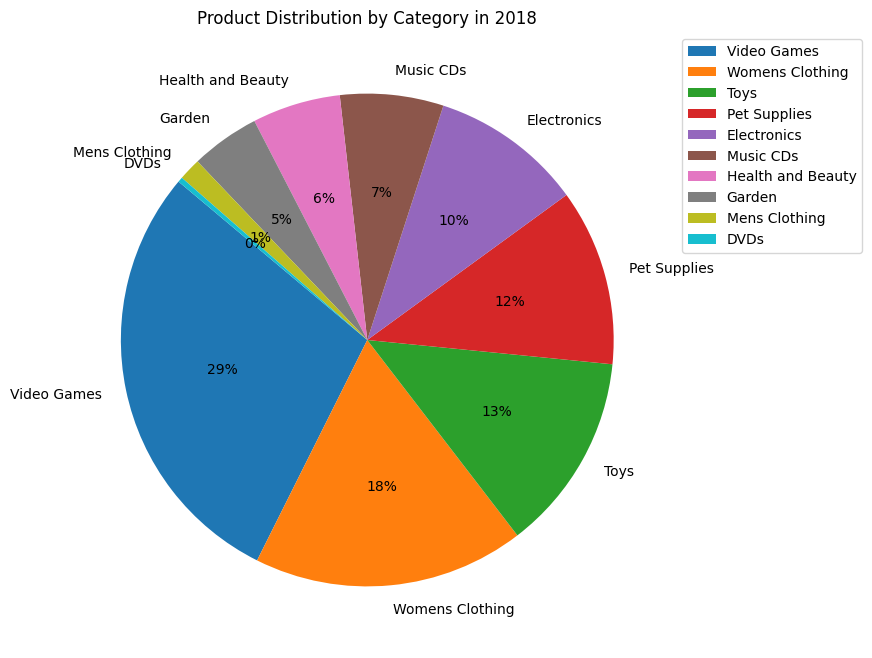

In [975]:
# Creates the DataFrame
data = {
    'Date_of_order': product_type2018['Date_of_order'],
    'Product_name': product_type2018['Product_name'],
    'Category_Name': product_type2018['Category_Name'],
    'Year': product_type2018['Year']
}

product_type2018 = pd.DataFrame(data)

# Groups by 'Category_Name' and counts for each product sold
category_counts = product_type2018['Category_Name'].value_counts()

# Plot the pie chart

plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.0f%%', startangle=140, labels=category_counts.index)
plt.title('Product Distribution by Category in 2018')
plt.ylabel('')  # Hides the y-label
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


In [976]:
# Extracts year from Date_of_Order column

product_type2017 = product_type[product_type['Year'] == 2017]
# Grabs data for only the year 2017
product_type2017

,Date_of_order,Product_name,Category_Name,Year
2123,2017-12-31,DVDs,DVDs,2017
2124,2017-12-31,DVDs,DVDs,2017
2125,2017-12-31,DVDs,DVDs,2017
2126,2017-12-31,DVDs,DVDs,2017
2127,2017-12-31,DVDs,DVDs,2017
...,...,...,...,...
270616,2017-01-01,Under Armour Girls' Toddler Spine Surge Runni,Sports/Fitness Shoes,2017
270617,2017-01-01,Total Gym 1400,Sports/Fitness Equipment,2017
270618,2017-01-01,Total Gym 1400,Sports/Fitness Equipment,2017
270619,2017-01-01,Total Gym 1400,Sports/Fitness Equipment,2017


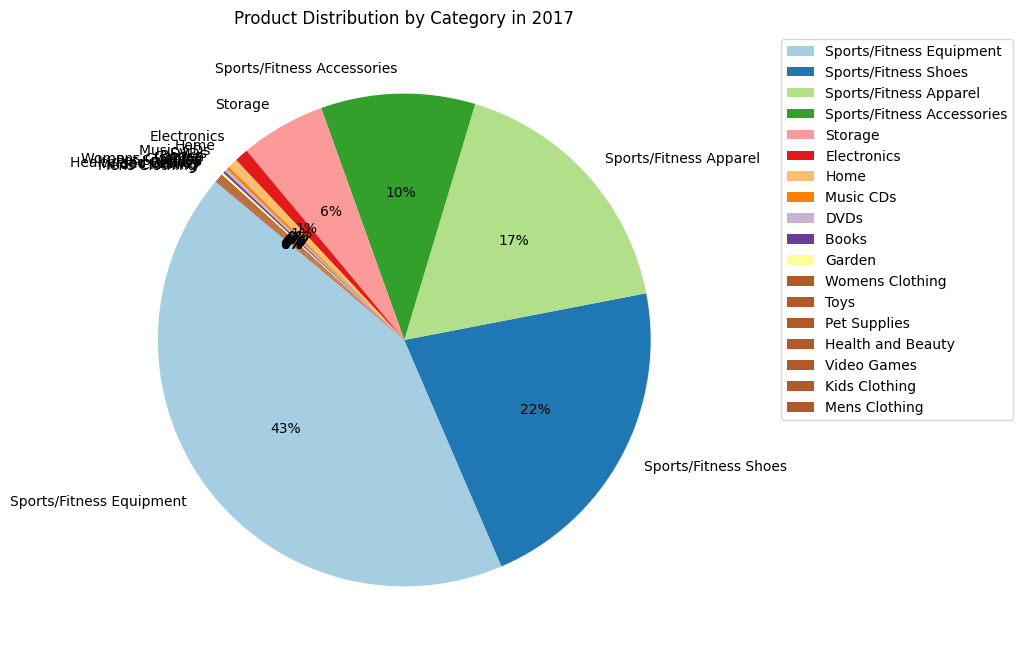

In [977]:
# Creates the DataFrame
data2 = {
    'Date_of_order': product_type2017['Date_of_order'],
    'Product_name': product_type2017['Product_name'],
    'Category_Name': product_type2017['Category_Name'],
    'Year': product_type2017['Year']
}

product_type2017 = pd.DataFrame(data2)

# Groups by 'Category_Name' and counts for each product sold
category_counts2 = product_type2017['Category_Name'].value_counts()

# Plot the pie chart

plt.figure(figsize=(8, 8))
category_counts2.plot(kind='pie', autopct='%1.0f%%', startangle=140, labels=category_counts2.index, colors=plt.cm.Paired(range(len(category_counts2))))
plt.title('Product Distribution by Category in 2017')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()

In [978]:
# Extracts year from Date_of_Order column
product_type2016 = product_type[product_type['Year'] == 2016]

# Grabs data for only the year 2016
product_type2016

,Date_of_order,Product_name,Category_Name,Year
270621,2016-12-31,Nike Men's Dri-FIT Victory Golf Polo,Sports/Fitness Apparel,2016
270622,2016-12-31,Total Gym 1400,Sports/Fitness Equipment,2016
270623,2016-12-31,Nike Men's Free 5.0+ Running Shoe,Sports/Fitness Shoes,2016
270624,2016-12-31,Nike Men's Free 5.0+ Running Shoe,Sports/Fitness Shoes,2016
270625,2016-12-31,Nike Men's Free 5.0+ Running Shoe,Sports/Fitness Shoes,2016
...,...,...,...,...
625256,2016-01-01,Total Gym 1400,Sports/Fitness Equipment,2016
625257,2016-01-01,Total Gym 1400,Sports/Fitness Equipment,2016
625258,2016-01-01,Under Armour Hustle Storm Medium Duffle Bag,Sports/Fitness Accessories,2016
625259,2016-01-01,Perfect Fitness Perfect Rip Deck,Sports/Fitness Equipment,2016


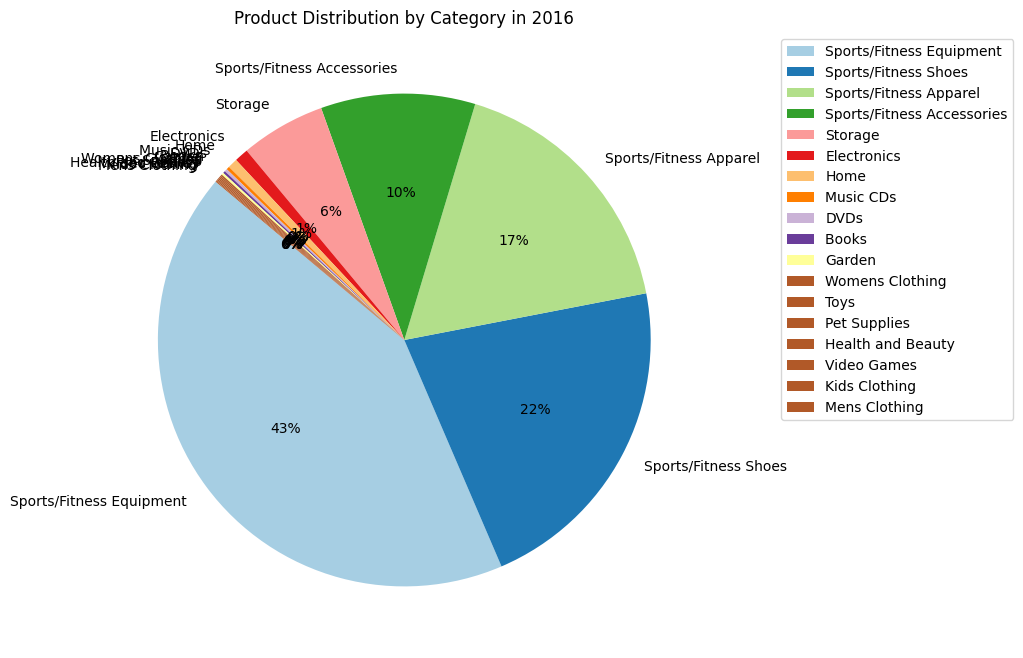

In [979]:
# Creates the DataFrame
data3 = {
    'Date_of_order': product_type2016['Date_of_order'],
    'Product_name': product_type2016['Product_name'],
    'Category_Name': product_type2016['Category_Name'],
    'Year': product_type2016['Year']
}

product_type2016 = pd.DataFrame(data2)

# Groups by 'Category_Name' and counts for each product sold
category_counts3 = product_type2016['Category_Name'].value_counts()

# Plot the pie chart

plt.figure(figsize=(8, 8))
category_counts3.plot(kind='pie', autopct='%1.0f%%', startangle=140, labels=category_counts3.index, colors=plt.cm.Paired(range(len(category_counts3))))
plt.title('Product Distribution by Category in 2016')
plt.ylabel('')  # Hide the y-label
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()

In [980]:
# Extracts year from Date_of_Order column
product_type2015 = product_type[product_type['Year'] == 2015]

# Grabs data for only the year 2015
product_type2015

,Date_of_order,Product_name,Category_Name,Year
625261,2015-12-31,Nike Men's Free 5.0+ Running Shoe,Sports/Fitness Shoes,2015
625262,2015-12-31,Nike Men's Dri-FIT Victory Golf Polo,Sports/Fitness Apparel,2015
625263,2015-12-31,Cleveland Golf Women's 588 RTX CB Satin Chrom,Sports/Fitness Equipment,2015
625264,2015-12-31,Cleveland Golf Women's 588 RTX CB Satin Chrom,Sports/Fitness Equipment,2015
625265,2015-12-31,Nike Women's Tempo Shorts,Sports/Fitness Apparel,2015
...,...,...,...,...
984735,2015-01-01,Nike Men's Dri-FIT Victory Golf Polo,Sports/Fitness Apparel,2015
984736,2015-01-01,Nike Men's CJ Elite 2 TD Football Cleat,Sports/Fitness Shoes,2015
984737,2015-01-01,Nike Men's Dri-FIT Victory Golf Polo,Sports/Fitness Apparel,2015
984738,2015-01-01,Nike Men's Dri-FIT Victory Golf Polo,Sports/Fitness Apparel,2015


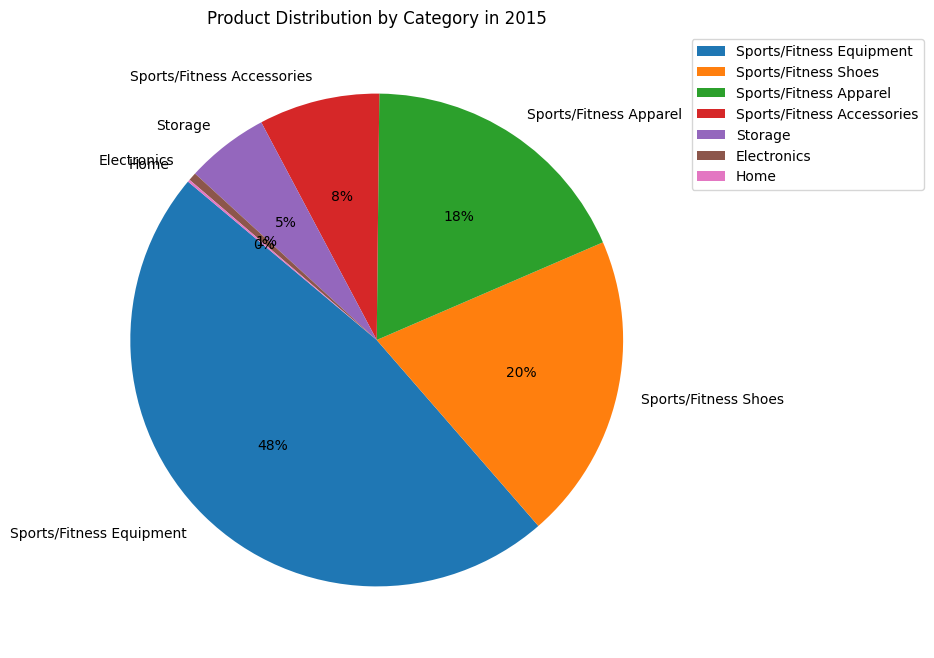

In [981]:
# Creates the DataFrame
data4 = {
    'Date_of_order': product_type2015['Date_of_order'],
    'Product_name': product_type2015['Product_name'],
    'Category_Name': product_type2015['Category_Name'],
    'Year': product_type2015['Year']
}

product_type2015 = pd.DataFrame(data4)

# Groups by 'Category_Name' and counts for each product sold
category_counts4 = product_type2015['Category_Name'].value_counts()

# Plot the pie chart

plt.figure(figsize=(8, 8))
category_counts4.plot(kind='pie', autopct='%1.0f%%', startangle=140, labels=category_counts4.index)
plt.title('Product Distribution by Category in 2015')
plt.ylabel('')  
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Profits trend 

In [982]:
profit_data = pd.read_csv('/Users/jeremyp/Desktop/business_analytics_h.ws:notes/jeremy_perez/profits.csv')
profit_data

,Date_of_order,Product_name,sum_sales,Order_Profit_Per_Order
0,2018-01-31,Fighting video games,39.750000,9.790000
1,2018-01-31,Toys,11.540000,1.530000
2,2018-01-31,Smart watch,327.750000,91.250000
3,2018-01-31,Summer dresses,215.820007,-126.559998
4,2018-01-31,Summer dresses,215.820007,-107.959999
...,...,...,...,...
984735,2015-01-01,Pelican Maverick 100X Kayak,129.990005,36.470001
984736,2015-01-01,Pelican Sunstream 100 Kayak,129.990005,36.470001
984737,2015-01-01,Pelican Maverick 100X Kayak,250.000000,68.250000
984738,2015-01-01,Pelican Sunstream 100 Kayak,199.990005,91.180000


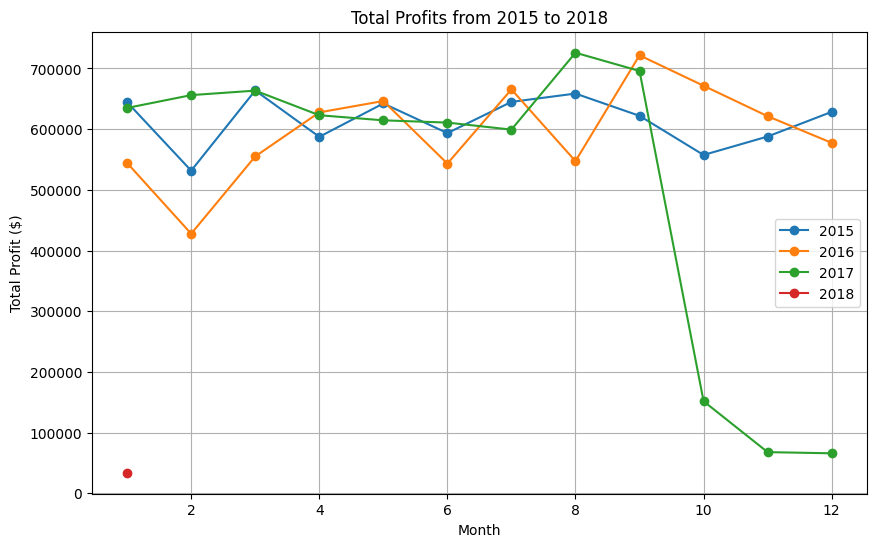

In [983]:
# Converts 'Date_of_order' column to datetime
profit_data['Date_of_order'] = pd.to_datetime(profit_data['Date_of_order'])

# Extract year and month
profit_data['Year'] = profit_data['Date_of_order'].dt.year
profit_data['Month'] = profit_data['Date_of_order'].dt.month

# Groups the profit_data by year and month and calculates the total profit
monthly_profit = profit_data.groupby(['Year', 'Month'])['Order_Profit_Per_Order'].sum()

# Plotting
plt.figure(figsize=(10, 6))

#For-loop determines the color for each line by the year
for year in monthly_profit.index.levels[0]:
    year_profit_data = monthly_profit.loc[year]
    plt.plot(year_profit_data.index, year_profit_data.values, label=year,marker='o')

plt.xlabel('Month')
plt.ylabel('Total Profit ($)')
plt.title('Total Profits from 2015 to 2018')
plt.legend(loc='best')
plt.grid()

plt.show()